In [1]:
%load_ext autoreload
%autoreload 2

from mcmc import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Basic 10 nodes susceptibility and TE

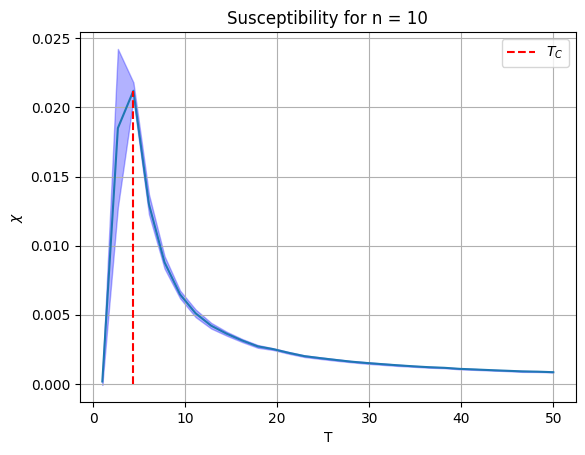

In [4]:
n = 10
temperatures = np.linspace(1, 50, 30)
sim_data = run_simulation(15, 10000, temperatures, n)
idx = np.argmax(sim_data[2])
tc = temperatures[idx]

plt.plot(temperatures, sim_data[2])
lower_bound = np.subtract(sim_data[2], sim_data[3])
upper_bound = np.add(sim_data[2], sim_data[3])
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = 'b')
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for n = 10')
plt.grid()
plt.vlines(tc, 0, np.max(sim_data[2]), linestyles='dashed', colors='r', label = r'$T_C$')
plt.legend()
plt.savefig('Results/Sus_basic.png', bbox_inches = 'tight')

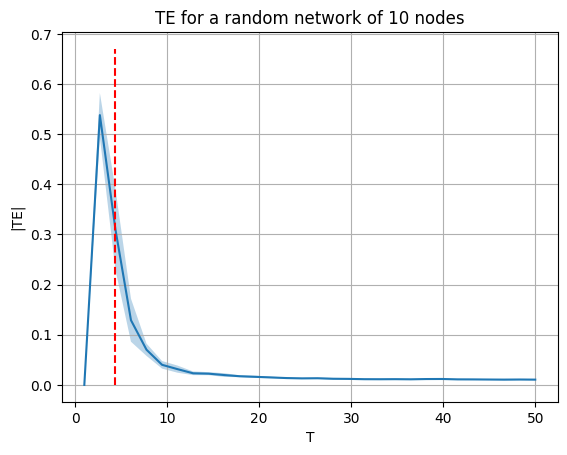

In [6]:
temperatures = np.linspace(1, 50, 30)
runs = 15
n_iterations = 10000
C = []
C_std = []
multi_sus = []
n = 10

for T in temperatures:
    x = np.zeros(runs)
    sus = np.zeros(runs)
    for i in range(0, runs):
        J = conn_matrix_basic(n)
        spins = random_spins(n)        
        _, list_avg_magnetisation, sus[i], spins_timeseries = metropolis(spins, n_iterations, T, J) 
        x[i] = TE(spins_timeseries, J)
    C_std.append(np.std(x))
    C.append(np.abs(np.mean(x)))
    multi_sus.append(np.mean(sus))

lower_bound = np.subtract(C, C_std)
upper_bound = np.add(C, C_std)
plt.plot(temperatures, C)
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.title('TE for a random network of 10 nodes')
plt.vlines(tc, 0, 0.67, linestyles='dashed', colors='r')
plt.savefig('Results/10_nodes_TE.png', bbox_inches='tight')

## System size susceptibility and TE

In [ ]:
ns = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
n_iterations = 5000
runs = 15
temperatures = np.linspace(1, 100, 100)

tcs = np.zeros(len(ns))
tcs_std = np.zeros(len(ns))
peaks = np.zeros(len(ns))
peaks_std = np.zeros(len(ns))

for i, n in enumerate(ns): # loop 
    tc = np.zeros(runs)
    peak = np.zeros(runs)
    for j in range(0, runs):
        sus = np.zeros(len(temperatures))
        for k, T in enumerate(temperatures):
            J = conn_matrix_basic(n)
            spins = random_spins(n)
            spins, avg_magnetisation, sus[k], spins_timeseries = metropolis(spins, n_iterations, T, J)
        idx = np.argmax(sus)
        tc[j] = temperatures[idx]
        peak[j] = sus[idx]

    tcs[i] = np.mean(tc)
    tcs_std[i] = np.std(tc)
    peaks[i] = np.mean(peak)
    peaks_std[i] = np.std(peak)  

In [ ]:
lower_bound = np.subtract(tcs, tcs_std)
upper_bound = np.add(tcs, tcs_std)
    
plt.plot(ns, tcs)
plt.fill_between(ns,lower_bound, upper_bound, alpha=0.3)

plt.xlabel('Number of nodes')
plt.ylabel(r'$T_c$')
plt.title('Critical temperature for different system sizes')
plt.savefig('critical_t_system_size.png')

In [ ]:
lower_bound = np.subtract(peaks, peaks_std)
upper_bound = np.add(peaks, peaks_std)

plt.plot(ns, peaks)
plt.fill_between(ns,lower_bound, upper_bound, alpha=0.3)

plt.xlabel('Number of nodes')
plt.ylabel(r'$\chi_{max}$')
plt.title('Max susceptibility for different system sizes')
plt.savefig('max_sus_system_size.png')

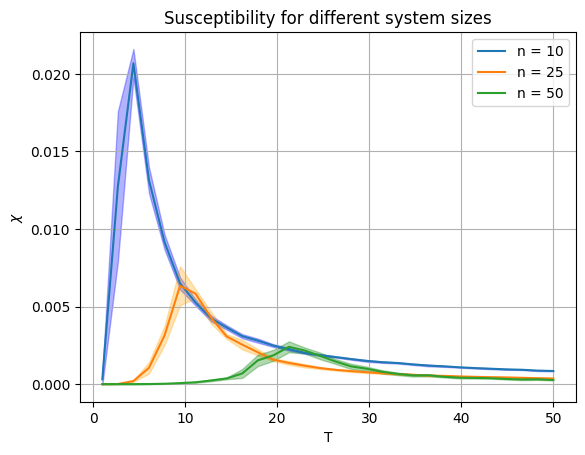

In [7]:
# Calculate susceptibility for different system sizes
ns = [10, 25, 50]
tcs = np.zeros(len(ns))
temperatures = np.linspace(1, 50, 30)
colors = ['b', 'orange', 'g']

for i, n in enumerate(ns): # loop over different system sizes
    # J = conn_matrix_basic(n)
    sim_data = run_simulation(10, 10000, temperatures, n, J)

    # Plot results
    plt.plot(temperatures, sim_data[2], label = 'n = {}'.format(n))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different system sizes')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_system_sizes.png', bbox_inches = 'tight')

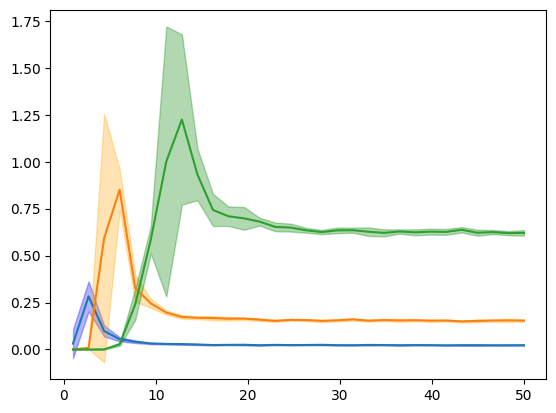

In [24]:
# Calculate TE for diffferent system sizes
ns = [10, 25, 50]
temperatures = np.linspace(1, 50, 30)
runs = 10
n_iterations = 5000
colors = ['b', 'orange', 'g']


for i, n in enumerate(ns): # loop over system sizes

    C = []
    C_std = []

    for T in temperatures: # loop over temperatures
        x = np.zeros(runs)
        sus = np.zeros(runs)

        for j in range(0, runs): # run simulation 10 times
            J = conn_matrix_power(n)
            spins = random_spins(n)        
            _, list_avg_magnetisation, sus[j], spins_timeseries = metropolis(spins, n_iterations, T, J) 
            x[j] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))

    # Plot results
    plt.plot(temperatures, C, label = 'n = {}'.format(n))
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
plt.ylabel('TE')
plt.xlabel('T')
plt.title('TE for different system sizes')
plt.legend()
plt.grid()
plt.savefig('Results/TE_system_sizes.png', bbox_inches = 'tight')    


## Susceptibility and TE for different means

In [3]:
# Calculate susceptibility for different means
mean_list = [0.2, 0.5, 0.8]
temperatures = np.linspace(0.5, 30, 30)
colors = ['b', 'orange', 'g']
n = 10

for i, mean in enumerate(mean_list): # loop over different means
    # J = mean_matrix(n, mean)
    sim_data = run_simulation(10, 10000, temperatures, n, c_matrix_fun=mean_matrix(mean))

    # Plot results
    plt.plot(temperatures, sim_data[2], label = 'mean = {}'.format(mean))
    lower_bound = np.subtract(sim_data[2], sim_data[3])
    upper_bound = np.add(sim_data[2], sim_data[3])
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = colors[i])
    
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for different system means')
plt.legend()
plt.grid()
plt.savefig('Results/Sus_means.png', bbox_inches = 'tight')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of array(float64, 2d, C) with parameters (int64)
No type info available for array(float64, 2d, C) as a callable.
During: resolving callee type: array(float64, 2d, C)
During: typing of call at /Users/macbookair/Desktop/Studie/Master/Jaar_1/Complex System Simulation/Project/CSS2023/mcmc.py (145)


File "mcmc.py", line 145:
def multi_metropolis_basic(n_simulations:int, n_iterations:int, T:float, n:int, c_matrix:np.array=None, c_matrix_fun=conn_matrix_basic, burn_in:int=1000):
    <source elided>
        if c_matrix != None:
            c_matrix = c_matrix_fun(n)
            ^

During: resolving callee type: type(CPUDispatcher(<function multi_metropolis_basic at 0x7fb55c5bdbd0>))
During: typing of call at /Users/macbookair/Desktop/Studie/Master/Jaar_1/Complex System Simulation/Project/CSS2023/mcmc.py (168)

During: resolving callee type: type(CPUDispatcher(<function multi_metropolis_basic at 0x7fb55c5bdbd0>))
During: typing of call at /Users/macbookair/Desktop/Studie/Master/Jaar_1/Complex System Simulation/Project/CSS2023/mcmc.py (168)


File "mcmc.py", line 168:
def run_simulation(n_simulations:int, n_iterations:int, T_list:np.array, n:int, c_matrix:np.array=None, c_matrix_fun=conn_matrix_basic, burn_in:int=1000):
    <source elided>
    for i, T in enumerate(T_list):
        means_mag[i], stds_mag[i], means_sus[i], stds_sus[i] = multi_metropolis_basic(n_simulations, n_iterations, T, n, c_matrix, c_matrix_fun, burn_in)
        ^


In [ ]:
mean_list = [0.2,0.5,0.8]
temperatures = np.linspace(0.5, 25, 50)

for mean in mean_list:
    sims =run_simulation_diff_connectivity(n_simulations=20, n_iterations=2500,T_list =temperatures, n = 10, c_matrix_fun=mean_matrix, c_matrix_arg = mean, burn_in=500)
    means_mag, stds_mag, means_sus, stds_sus = sims
    lower_bound = np.subtract(means_mag, stds_mag)
    upper_bound = np.add(means_mag, stds_mag)
    plt.plot(T_list, means_mag, label = "mean = %f" %mean)
    plt.fill_between(T_list, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('M')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('A random network of 10 nodes with different mean (M)')
plt.savefig('10_nodes_TE.png', bbox_inches='tight')
plt.show()

for mean in mean_list:
    sims = run_simulation_diff_connectivity(n_simulations=20, n_iterations=2500, T_list =temperatures,n = 10, c_matrix_fun=mean_matrix, c_matrix_arg = mean, burn_in=500)
    means_mag, stds_mag, means_sus, stds_sus = sims
    lower_bound = np.subtract(means_sus, stds_sus)
    upper_bound = np.add(means_sus, stds_sus)
    plt.plot(T_list, means_sus, label = "mean = %f" %mean)
    plt.fill_between(T_list, lower_bound, upper_bound, alpha=0.3)

plt.xlabel('T')
plt.ylabel('Susceptibility')
plt.grid()
plt.title("$\chi$ with different mean")
plt.show()

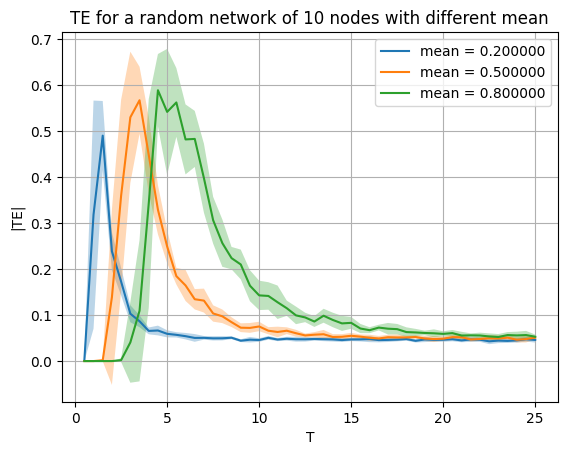

In [26]:
mean_list = [0.2, 0.5, 0.8]
temperatures = np.linspace(0.5, 25, 50)
n = 10

for mean in mean_list:
    
    J = mean_matrix(n, mean)
    C= []
    C_std = []
    for T in temperatures:
        x = np.zeros(n)
        for i in range(0, n):
            spins = random_spins(n)        
            _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins,2500, T, J, 500) 
            x[i] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.plot(temperatures, C,  label = "mean = %f" %mean)
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('TE for a random network of 10 nodes with different mean')
plt.savefig('Results/TE_means.png', bbox_inches='tight')
plt.show()